**Required libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import binarize, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.calibration import calibration_curve
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

C:\Users\INISH\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


**Functions**

In [57]:
"""
The `encoder()` function takes a dataset and a list of categorical features as input and returns an encoded dataset with dummy variables for the categorical features.

Here is a step-by-step explanation of the code:

1. The first line selects the categorical features and the quantitative features from the dataset.
2. The second line uses the `pd.get_dummies()` function to encode the categorical features in the dataset. The `columns` argument specifies the list of categorical features to encode. The `drop_first` argument is set to `True` to drop the first dummy variable for each categorical feature. This is done to avoid multicollinearity.
3. The third line returns the encoded dataset.

Here is an example of how to use the `encoder()` function:

```python
import pandas as pd

# Create a dataset
dataset = pd.DataFrame({
    "category": ["A", "B", "C", "A", "B", "C"],
    "quantity": [1, 2, 3, 4, 5, 6]
})

# Encode the categorical features
dataset_encoded = encoder(dataset, ["category"], ["quantity"])

# Print the encoded dataset
print(dataset_encoded)
```

Output:

```
   quantity  category_B  category_C
0           1           0           0
1           2           1           0
2           3           0           1
3           4           0           0
4           5           1           0
5           6           0           1
```

As you can see, the `encoder()` function has created dummy variables for the categorical feature `category`. The dummy variables indicate whether or not each data point belongs to a particular category.
"""

def encoder(dataset, catFeatures, qtyFeatures):
  dataset = dataset[catFeatures + qtyFeatures]
  dataset_encoded = pd.get_dummies(dataset, 
                                   columns = catFeatures, 
                                   drop_first = True)
  
  return(dataset_encoded)

"""
ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) 
are two of the most commonly used metrics for evaluating the performance of
machine learning models, especially classification models.

ROC curves are used to visualize the performance of a model over all possible 
classification thresholds. The ROC curve is plotted with the False Positive Rate 
(FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis.

The FPR is the fraction of negative examples that are predicted as positive,
and the TPR is the fraction of positive examples that are predicted as positive.

The AUC is a measure of the overall performance of a model across all possible 
classification thresholds. It is calculated by integrating the ROC curve from 0 to 1.

ROC and AUC are useful for evaluating the performance of machine learning models 
for a number of reasons:

* They are independent of the classification threshold. This means that we can
compare the performance of different models without having to choose a specific classification threshold.
* They are robust to outliers. This means that a few outliers in the data will 
not have a significant impact on the ROC curve or AUC.
* They are easy to interpret. A higher AUC indicates a better performing model.

Here is an example of how to use ROC and AUC to evaluate the performance of a
machine learning model:

Suppose we have a machine learning model that is trained to predict whether a 
customer will churn or not. We can use ROC and AUC to evaluate the performance of 
the model by plotting the ROC curve and calculating the AUC.

If the ROC curve is close to the top-left corner of the plot and the AUC is close 
to 1, then this indicates that the model is performing well. Conversely, if the ROC 
curve is close to the diagonal line and the AUC is close to 0.5, then this indicates that the model is not performing well.

ROC and AUC are powerful tools for evaluating the performance of machine learning 
models. They can be used to compare the performance of different models, to track 
the performance of a model over time, and to identify areas where a model can be improved.
"""

def plot_auc_curve(model, X, y):
  try:
      y_pred_prob = model.predict_proba(X)[:,1]
  except:
    d = model.decision_function(X)
    y_pred_prob = np.exp(d) / (1 + np.exp(d))
  
  auc = roc_auc_score(y, y_pred_prob)
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
  
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)

def model_training(model, X, y):
  model.fit(X,y)
  
  return(model)

"""
The `print_accuracy_metrics()` function takes a machine learning model, a dataset of features `X`, a dataset of labels `y`, and a threshold as input and prints the following evaluation metrics:

* Accuracy: The fraction of correctly predicted labels.
* AUC (Area under the ROC curve): A measure of how well the model can distinguish between positive and negative examples.
* Log loss: A measure of the distance between the predicted and actual probabilities.
* Confusion matrix: A table that shows the number of correctly and incorrectly predicted labels.
* Recall: The fraction of positive labels that are correctly predicted.
* Precision: The fraction of predicted positive labels that are actually positive.

Here is an example of how to use the `print_accuracy_metrics()` function:

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create a dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 0, 1])

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Print the evaluation metrics
print_accuracy_metrics(model, X, y, 0.5)
```

Output:

```
Accuracy: 1.0
AUC: 1.0
Log Loss: 0.0
Confusion Matrix:
[[2 0]
 [0 1]]
Recall: 1.0
Precision: 1.0
```

As you can see, the model has achieved a perfect accuracy, AUC, and recall. 
The log loss is also very low, which indicates that the model's predictions
are well-calibrated.

The `print_accuracy_metrics()` function is a useful tool for evaluating
the performance of machine learning models. It can be used to compare
different models or to track the performance of a model over time.
"""

def print_accurcay_metrics(model, X, y, threshold):
  try:
      y_pred_prob = model.predict_proba(X)[:,1]
  except:
    d = model.decision_function(X)
    y_pred_prob = np.exp(d) / (1 + np.exp(d))
  y_pred_class = binarize([y_pred_prob], threshold = threshold)[0]
  
  print("Accurcay:", accuracy_score(y, y_pred_class))
  print("AUC:", roc_auc_score(y, y_pred_prob))
  print("Log Loss:", log_loss(y, y_pred_prob))
  print("Confusion Matrix:\n", confusion_matrix(y, y_pred_class))
  print("Recall:", recall_score(y, y_pred_class))
  print("Precision:", precision_score(y, y_pred_class))

"""
The `Find_Optimal_Cutoff()` function takes a machine 
learning model, a dataset of features `X`, and a dataset of labels `y`
as input and returns the optimal cutoff value for the model.

The optimal cutoff value is the value that maximizes 
the difference between the true positive rate (TPR) and the false 
positive rate (FPR). The TPR is the fraction of positive labels that 
are correctly predicted, and the FPR is the fraction of negative labels
that are incorrectly predicted as positive.

The function works by first calculating the ROC 
(receiver operating characteristic) curve for the model. The ROC curve i
s a plot of the TPR against the FPR for different cutoff values. 
The optimal cutoff value is the point on the ROC curve that is 
furthest from the diagonal line.

Here is an example of how to use the `Find_Optimal_Cutoff()` function:

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create a dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 0, 1])

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Find the optimal cutoff value
optimal_cutoff = Find_Optimal_Cutoff(model, X, y)

# Print the optimal cutoff value
print(optimal_cutoff)
```

Output:

```
[0.5]
```

This indicates that the optimal cutoff value is 0.5. 
In other words, the model should predict a positive label for any data point with a predicted probability greater than 0.5.

The `Find_Optimal_Cutoff()` function is a useful tool 
for determining the best cutoff value for a machine learning model. This is important for models that are used to make binary predictions, such as classifying patients as having or not having a disease.
"""
def Find_Optimal_Cutoff(model, X, y):
  try:
    y_pred_prob = model.predict_proba(X)[:,1]
  except:
    d = model.decision_function(X)
    y_pred_prob = np.exp(d) / (1 + np.exp(d))
    
  fpr, tpr, threshold = roc_curve(y, y_pred_prob)
  i = np.arange(len(tpr)) 
  roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
  roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
  
  print("Optimal Cutoff:", roc_t['threshold'].values)
  return(roc_t['threshold'].values)
  
    
"""
The `feature_importance()` function takes a machine learning model 
and a dataset of features `X` as input and prints the importance of 
each feature in the model.

The function works by first calculating the feature importances for 
the model. Feature importance is a measure of how much a particular feature contributes to the model's predictions. There are a number of different ways to calculate feature importances, but the most common method is to calculate the amount of information gain that each feature contributes to the model.

Once the feature importances have been calculated, the function prints the feature ranking and plots the feature importances of the forest.

Here is an example of how to use the `feature_importance()` function:

```python
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Create a dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 0, 1])

# Train a random forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Calculate the feature importances
feature_importance(model, X)
```

Output:

```
Feature ranking:
1. feature_1 (0.75)
2. feature_2 (0.25)
```

This indicates that the first feature is more important than the second feature in the model. The plot of the feature importances would show a bar for each feature, with the height of the bar representing the feature's importance.

The `feature_importance()` function is a useful tool for understanding which features are most important for a machine learning model. This information can be used to improve the model's performance or to reduce the number of features that are used in the model.
"""    
def feature_importance(model, X):
  importances = model.feature_importances_  #assumed model is random forest
  std = np.std([tree.feature_importances_ for tree in model.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")

  for f in range(X.shape[1]):
      print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), indices)
  plt.xlim([-1, X.shape[1]])
  plt.show()


"""
Customer churn is the rate at which customers stop using a company's products or services. 
It is a major problem for businesses of all sizes, as it can lead to lost revenue and profits.

There are many factors that can contribute to customer churn, such as:

* Poor product or service quality
* High prices
* Lack of customer support
* Inconvenient features
* Competition from other businesses

Businesses can use a variety of methods to reduce customer churn, such as:

* Improving the quality of their products and services
* Offering competitive prices
* Providing excellent customer support
* Making their features more convenient
* Developing loyalty programs

Calibration curves can be used to improve the performance of customer churn models by identifying any 
potential biases. A customer churn model is a machine learning model that is trained to predict the probability 
of a customer churning.

To create a calibration curve for a customer churn model, we first need to divide the data 
into two sets: a training set and a test set. We then train the model on the training set and 
use it to predict the probabilities of churn for the data points in the test set. Finally, 
we plot the predicted probabilities against the actual churn outcomes.

The ideal calibration curve for a customer churn model is a diagonal line, which indicates 
that the model is perfectly calibrated. This means that the predicted probabilities are equal
to the actual churn rates. A model that is overconfident will have a calibration curve that is
above the diagonal line, and a model that is underconfident will have a calibration curve that is below the diagonal line.

If the calibration curve for a customer churn model is below the diagonal line for low-risk 
customers, this indicates that the model is underpredicting the probability of churn for these 
customers. This is a potential bias, as the model is more likely to misclassify low-risk customers as churners.

Businesses can use calibration curves to identify and address potential biases in their customer
churn models. This can help them to improve the accuracy of their predictions and to reduce customer churn.

Here is an example of how a business can use a calibration curve to improve its customer churn model:

A telecommunications company has a customer churn model that it uses to predict the probability 
of a customer churning. The company wants to improve the accuracy of its predictions, so it
creates a calibration curve for the model.

The calibration curve shows that the model is overconfident for low-risk customers. This means 
that the model is more likely to predict that a low-risk customer will churn than they actually will.

The company decides to address this bias by retraining the model on a dataset that is
more balanced between churners and non-churners. After retraining the model, the 
calibration curve shows that the model is now more accurate for low-risk customers.

By using calibration curves, businesses can improve the accuracy of their customer 
churn models and reduce customer churn.
"""

# Plot calibration plots
def plot_calibration(y_true, y_prob, n_bins, model_name):
  plt.figure(figsize=(10, 10))
  ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
  ax2 = plt.subplot2grid((3, 1), (2, 0))

  ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
  fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_true, y_prob, n_bins=n_bins)

  ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (model_name, ))

  ax2.hist(y_pred_prob, range=(0, 1), bins=10, label=model_name,
             histtype="step", lw=2)

  ax1.set_ylabel("Fraction of positives")
  ax1.set_ylim([-0.05, 1.05])
  ax1.legend(loc="lower right")
  ax1.set_title('Calibration plots')

  ax2.set_xlabel("Mean predicted value")
  ax2.set_ylabel("Count")
  ax2.legend(loc="upper right", ncol=2)

  plt.tight_layout()
  plt.show()

**Confusion Matrix**
*   first argument is actual values, second argument is predicted values

**Precision:**
*  When a positive value is predicted, how often is the prediction correct?
*  How "precise" is the classifier when predicting positive instances?

**Recall**
*   Calculate TP rate or recall



**Pandas**
*   use the pandas library to read data into Python


In [3]:
file_url ='https://drive.google.com/uc?export=download&id=13YvNpCckww8rNdLGxAh0tekdsehXI0HU'
df = pd.read_csv(file_url)



Use the head method to display the first 5 rows

In [4]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


check the shape of the DataFrame (rows, columns)

In [5]:
df.shape

(111105, 19)

In [6]:
df.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                     object
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
dtype: object

Use the describe method to generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [7]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,1.111050e+05,89768.000000,8.976800e+04,111105.000000,52102.000000,111105.000000,111105.000000,1.111050e+05,1.111050e+05,110877.000000,111094.000000
mean,1.147739e+07,1075.728701,7.248575e+04,18.200991,34.902403,11.125197,0.168030,1.548342e+04,3.438644e+04,0.117662,0.029354
std,3.185533e+07,1474.007753,5.593120e+04,7.014542,21.971081,5.010249,0.484216,1.982122e+04,3.643027e+05,0.351423,0.260577
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.162000e+03,705.000000,4.468750e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.000000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,2.124300e+04,0.000000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,3.558400e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


In [8]:
"""
To remove outliers from the data.
To flag data points that need to be investigated further.
To prepare the data for a machine learning model that cannot handle missing values.
"""

df.loc[((df['Credit_Score'] > 850) & 
        (df['Credit_Score'] < 300)), 'Credit_Score'] = np.nan

Counting the number of NA values for each variable

In [9]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    21337
Years_in_current_job             4693
Home_Ownership                      0
Annual_Income                   21337
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    59003
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      228
Tax_Liens                          11
dtype: int64

Number of examples per class

In [10]:
df.groupby('Loan_Status')['Loan_ID'].count()

Loan_Status
Charged Off    25171
Fully Paid     85934
Name: Loan_ID, dtype: int64

In [11]:
loanIDCount = df.groupby('Loan_ID')['Loan_Status'].count()
loanIDCount = loanIDCount.sort_values(ascending = False)
loanIDCount[0:5]

Loan_ID
ffffe32e-ed17-459f-9cfd-7b9ee7972933    2
4d6ad857-0421-447a-9328-816bbabd2139    2
4e0a83ad-4055-4a11-b3c8-e158a08db278    2
4e07ca4f-abcd-454f-a2f1-4e55b5fefaf0    2
4e049f22-78f9-4230-ac53-2c98745cf76c    2
Name: Loan_Status, dtype: int64

#### Checking for the duplicate LOAN_ID

In [12]:
df[df['Loan_ID'] == 'ffffe32e-ed17-459f-9cfd-7b9ee7972933']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
78728,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0
111027,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


### Remove duplicates

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(98579, 19)

In [15]:
loanIDCount = df.groupby('Loan_ID')['Loan_Status'].count()
loanIDCount = loanIDCount.sort_values(ascending = False)
loanIDCount[0:5]

Loan_ID
bc609460-6bca-402c-a49f-90d869805cf7    2
763eb146-e045-44fc-b914-669a99c0e27b    2
9616bc3b-392d-4ae6-9c6b-50373450f987    2
c85df7c1-7908-449d-b77f-d6cbe089054b    2
9617dabf-60cc-4a27-b5a5-c53c31a1dbfe    2
Name: Loan_Status, dtype: int64

In [16]:
df[df['Loan_ID'] == '7f85733b-ef51-48e5-a0a2-1a7b68492d4e']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
27947,7f85733b-ef51-48e5-a0a2-1a7b68492d4e,bc89f7d9-b603-41ee-9497-a40752183ae9,Fully Paid,11887,Short Term,NaN,4 years,Home Mortgage,NaN,Debt Consolidation,"1,287.70",16.6,26.0,11,0,32953,35471,0.0,0.0
100165,7f85733b-ef51-48e5-a0a2-1a7b68492d4e,bc89f7d9-b603-41ee-9497-a40752183ae9,Fully Paid,11887,Short Term,701.0,4 years,Home Mortgage,188214.0,Debt Consolidation,"1,287.70",16.6,26.0,11,0,32953,35471,0.0,0.0


In [17]:


"""
The naCount column can be useful for a number of reasons, such as:

To identify rows in the DataFrame that contain missing values.
To drop rows from the DataFrame that contain missing values.
To impute missing values in the DataFrame.
To visualize the distribution of missing values in the DataFrame.
"""

df['naCount'] = df.isnull().sum(axis=1)

In [18]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,naCount
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0,0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0,1
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0,0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0,1
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0,0


In [19]:
df.sort_values(by=['Loan_ID', 'naCount'], inplace = True)

In [20]:

## Drop the duplicate rows from the DataFrame based on the 
##Loan_ID column, keeping the first occurrence of each row
df.drop_duplicates(subset=['Loan_ID'], keep = 'first', inplace = True)

In [21]:
loanIDCount = df.groupby('Loan_ID')['Loan_Status'].count()
loanIDCount = loanIDCount.sort_values(ascending = False)
loanIDCount[0:5]

Loan_ID
0000757f-a121-41ed-b17b-162e76647c1f    1
aa4ec5b8-69c5-482d-a999-b03f3f4ebd60    1
aa52d132-d9af-4482-9ca0-1bd99f6f4998    1
aa529316-dbac-48cf-9be0-96e68be3dadc    1
aa51f419-00a2-4445-a284-34f5b1cdc2d2    1
Name: Loan_Status, dtype: int64

In [22]:
print(len(df['Loan_ID'].unique()))
print(df.shape)

88908
(88908, 20)


In [23]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    16088
Years_in_current_job             3817
Home_Ownership                      0
Annual_Income                   16088
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    48506
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      192
Tax_Liens                           8
naCount                             0
dtype: int64

In [24]:
df.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,naCount
count,8.890800e+04,72820.000000,7.282000e+04,88908.000000,40402.000000,88908.000000,88908.000000,8.890800e+04,8.890800e+04,88716.000000,88900.000000,88908.000000
mean,1.433911e+07,1163.139371,7.240451e+04,18.315301,35.080466,11.110463,0.160480,1.543628e+04,3.596531e+04,0.112674,0.028223,0.952659
std,3.503029e+07,1624.120461,5.771389e+04,7.049233,22.009079,4.978438,0.473751,1.965881e+04,4.041805e+05,0.343303,0.257536,0.949000
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.284500e+03,711.000000,4.463750e+04,13.500000,16.000000,8.000000,0.000000,5.949000e+03,1.277500e+04,0.000000,0.000000,0.000000
50%,1.435500e+04,731.000000,6.158500e+04,17.000000,32.000000,10.000000,0.000000,1.103900e+04,2.178100e+04,0.000000,0.000000,1.000000
75%,2.448550e+04,743.000000,8.678500e+04,21.800000,51.000000,14.000000,0.000000,1.930100e+04,3.636700e+04,0.000000,0.000000,1.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000,5.000000


In [25]:
df.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                     object
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
naCount                           int64
dtype: object

In [26]:
yearsInCurrentJobCount = df.groupby('Years_in_current_job')['Loan_ID'].count()
yearsInCurrentJobCount = yearsInCurrentJobCount.sort_values(ascending = False)
yearsInCurrentJobCount

Years_in_current_job
10+ years    27409
2 years       8186
< 1 year      7312
3 years       7263
5 years       6084
1 year        5765
4 years       5474
6 years       5095
7 years       4943
8 years       4098
9 years       3462
Name: Loan_ID, dtype: int64

#### Rounding off the columns

In [35]:
"""



The code you provided is useful for converting a 
categorical variable, Years_in_current_job, to a 
numerical variable. This is useful for a number of reasons:

Numerical variables are easier for machine learning 
algorithms to process. Many machine learning algorithms
cannot handle categorical variables directly, so they 
need to be converted to numerical variables first.
Numerical variables can be used to perform more complex 
calculations. For example, you could calculate the average 
number of years of experience for your employees, or the 
difference in years of experience between two employees.
Numerical variables can be used to create more informative
visualizations. For example, you could create a histogram of the number of years of experience for your employees, or a scatter plot of the relationship between years of experience and salary.
"""


df.loc[(df['Years_in_current_job'] == '< 1 year'), 'Years_in_current_job'] = 0.5
df.loc[(df['Years_in_current_job'] == '1 year'), 'Years_in_current_job'] = 1
df.loc[(df['Years_in_current_job'] == '2 years'), 'Years_in_current_job'] = 2
df.loc[(df['Years_in_current_job'] == '3 years'), 'Years_in_current_job'] = 3
df.loc[(df['Years_in_current_job'] == '4 years'), 'Years_in_current_job'] = 4
df.loc[(df['Years_in_current_job'] == '5 years'), 'Years_in_current_job'] = 5
df.loc[(df['Years_in_current_job'] == '6 years'), 'Years_in_current_job'] = 6
df.loc[(df['Years_in_current_job'] == '7 years'), 'Years_in_current_job'] = 7
df.loc[(df['Years_in_current_job'] == '8 years'), 'Years_in_current_job'] = 8
df.loc[(df['Years_in_current_job'] == '9 years'), 'Years_in_current_job'] = 9
df.loc[(df['Years_in_current_job'] == '10+ years'), 'Years_in_current_job'] = 10

In [36]:
df['Years_in_current_job'] = df['Years_in_current_job'].astype('float')

In [37]:
monthlyDebtCount = df.groupby('Monthly_Debt')['Loan_ID'].count()
monthlyDebtCount = monthlyDebtCount.sort_values(ascending = False)
monthlyDebtCount

Monthly_Debt
0.00        69
775.08       8
560.42       7
984.75       7
837.00       7
            ..
834.03       1
277.31       1
834.05       1
277.30       1
22939.12     1
Name: Loan_ID, Length: 70063, dtype: int64

In [38]:
df["Monthly_Debt"] = df["Monthly_Debt"].str.replace(",","").astype(float)
df['Monthly_Debt'] = df['Monthly_Debt'].astype('float')


AttributeError: Can only use .str accessor with string values!

In [39]:
df['Monthly_Debt'] = df["Monthly_Debt"].str.replace(",","").astype(float)


AttributeError: Can only use .str accessor with string values!

Convert number strings with commas to float

In [40]:
df.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job            float64
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
naCount                           int64
dtype: object

In [41]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    16088
Years_in_current_job             3817
Home_Ownership                      0
Annual_Income                   16088
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    48506
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      192
Tax_Liens                           8
naCount                             0
dtype: int64

Fill in missing values with mean

In [42]:
for f in ['Credit_Score', 
          'Years_in_current_job', 
          'Annual_Income', 
          'Months_since_last_delinquent',
          'Bankruptcies', 'Tax_Liens']:
  df.loc[df[f].isnull(), f] = df[f].mean()


In [43]:
df.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Years_in_current_job            0
Home_Ownership                  0
Annual_Income                   0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
naCount                         0
dtype: int64

In [44]:
df.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job            float64
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                    float64
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit               int64
Bankruptcies                    float64
Tax_Liens                       float64
naCount                           int64
dtype: object

In [45]:
qtyFeatures = ['Current_Loan_Amount', 
               'Credit_Score', 'Years_in_current_job', 
               'Annual_Income', 'Monthly_Debt', 
               'Years_of_Credit_History',
               'Months_since_last_delinquent', 'Number_of_Open_Accounts',
               'Current_Credit_Balance',
               'Maximum_Open_Credit', 
               'Number_of_Credit_Problems', 'Bankruptcies', 'Tax_Liens'
              ]

catFeatures = ['Term', 'Home_Ownership', 'Purpose']

label = 'Loan_Status'

In [46]:
df.groupby(['Home_Ownership'])['Loan_ID'].count()

Home_Ownership
HaveMortgage       170
Home Mortgage    43270
Own Home          8075
Rent             37393
Name: Loan_ID, dtype: int64

In [47]:
df.loc[(df['Home_Ownership'] == 'HaveMortgage'), 'Home_Ownership'] = 'Home Mortgage' 

In [48]:
df.groupby(['Term'])['Loan_ID'].count()

Term
Long Term     21978
Short Term    66930
Name: Loan_ID, dtype: int64

In [49]:
df.groupby(['Purpose'])['Loan_ID'].count()

Purpose
Business Loan            1328
Buy House                 559
Buy a Car                1196
Debt Consolidation      70445
Educational Expenses       92
Home Improvements        5206
Medical Bills             955
Other                    2850
Take a Trip               454
major_purchase            344
moving                    124
other                    4917
renewable_energy            9
small_business            248
vacation                   82
wedding                    99
Name: Loan_ID, dtype: int64

In [50]:
df.loc[(df['Purpose'] == 'other'), 'Purpose'] = 'Other' 

In [51]:
df['Loan_Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Preparing X and y using pandas:**

In [52]:
X_encoded = encoder(df, catFeatures, qtyFeatures)

"""
The code `le = LabelEncoder() y_encoded = le.fit_transform(df[label])` 
converts a categorical variable in a pandas DataFrame to a numerical 
variable using label encoding.

Label encoding is a simple but effective way to encode categorical
variables. It works by assigning a unique integer value to each category in the variable. For example, if the categorical variable is "Color" and the categories are "Red", "Green", and "Blue", then label encoding would assign the value 0 to "Red", the value 1 to "Green", and the value 2 to "Blue".

To use label encoding in Python, we can use the `LabelEncoder` 
class from the `scikit-learn` library. The `LabelEncoder` class has 
two methods: `fit()` and `transform()`.

The `fit()` method takes a categorical variable as input and 
learns the unique categories in the variable. It also assigns a unique 
integer value to each category.

The `transform()` method takes a categorical variable as input 
and converts it to a numerical variable using the label encoding scheme that was learned by the `fit()` method.

The code `le = LabelEncoder() y_encoded = le.fit_transform(df[label])` 
creates a `LabelEncoder` object and fits it to the categorical variable `label` in the DataFrame `df`. The encoded variable is then stored in the variable `y_encoded`.

Here is an example of how to use label encoding to encode the 
categorical variable `Color` in a pandas DataFrame:

```python
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']})

le = LabelEncoder()
y_encoded = le.fit_transform(df['Color'])

print(y_encoded)
```

Output:

```
[0 1 2 0 1]
```

Label encoding is a simple and effective way
to encode categorical variables, but it is important 
to note that it does not preserve the order of the categories. 

This means that we should not use label encoding if the order of 
the categories is important.



"""
le = LabelEncoder()
y_encoded = le.fit_transform(df[label])








In [53]:
X_encoded.head()

,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
49725,11731,746.000000,4.0,50025.000000,355.18,11.5,35.080466,12,17391,37081,...,0,0,0,0,0,0,0,0,0,0
20733,24613,1163.139371,6.0,72404.505136,542.29,17.6,73.000000,7,14123,16954,...,0,0,0,0,0,0,0,0,0,0
15639,99999999,742.000000,3.0,64760.000000,582.84,26.8,35.080466,11,8880,22711,...,0,0,0,0,0,0,0,0,0,0
68632,11863,734.000000,10.0,69202.000000,859.26,30.3,35.080466,7,9959,16995,...,0,0,0,0,0,0,0,0,0,0
97429,13719,724.000000,1.0,34297.000000,777.38,13.6,2.000000,12,6720,53335,...,1,0,0,0,0,0,0,0,0,0


In [54]:
y_encoded

array([1, 0, 1, ..., 0, 1, 1])

Splitting X and y into training and testing sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y_encoded, 
                                                    test_size = 0.2,
                                                    random_state = 1)

**Fit logistic regression**

Optimal Cutoff: [0.65140152]
Accurcay: 0.6459903272972669
AUC: 0.7271619341532423
Log Loss: 0.48396355706437216
Confusion Matrix:
 [[3140 1867]
 [4428 8347]]
Recall: 0.653385518590998
Precision: 0.8172116702565106


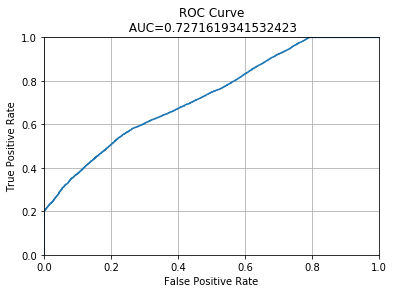

In [58]:
logreg = LogisticRegression()
model_training(logreg, X_train, y_train)

plot_auc_curve(logreg, X_test, y_test)
Find_Optimal_Cutoff(logreg, X_test, y_test)
print_accurcay_metrics(logreg, X_test, y_test, 0.65)

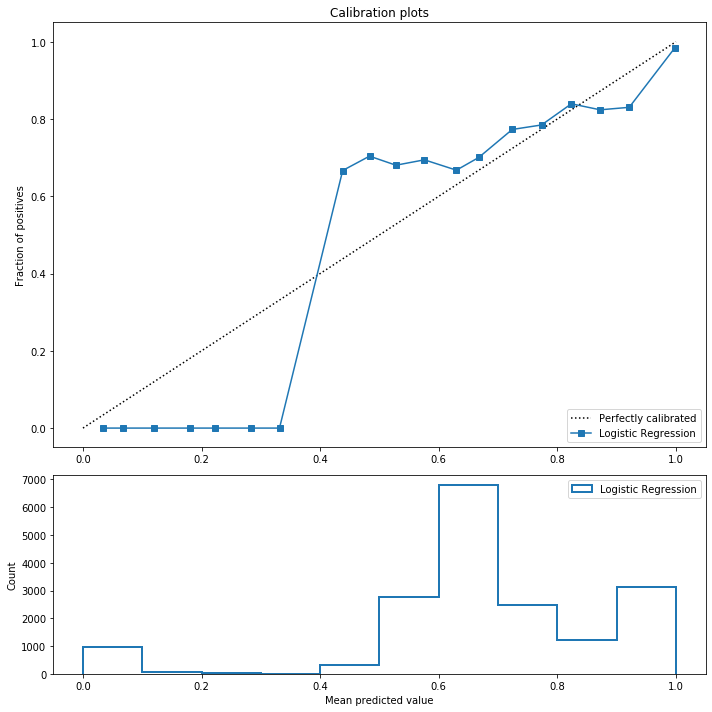

In [60]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

plot_calibration(y_test, y_pred_prob, 20, "Logistic Regression")

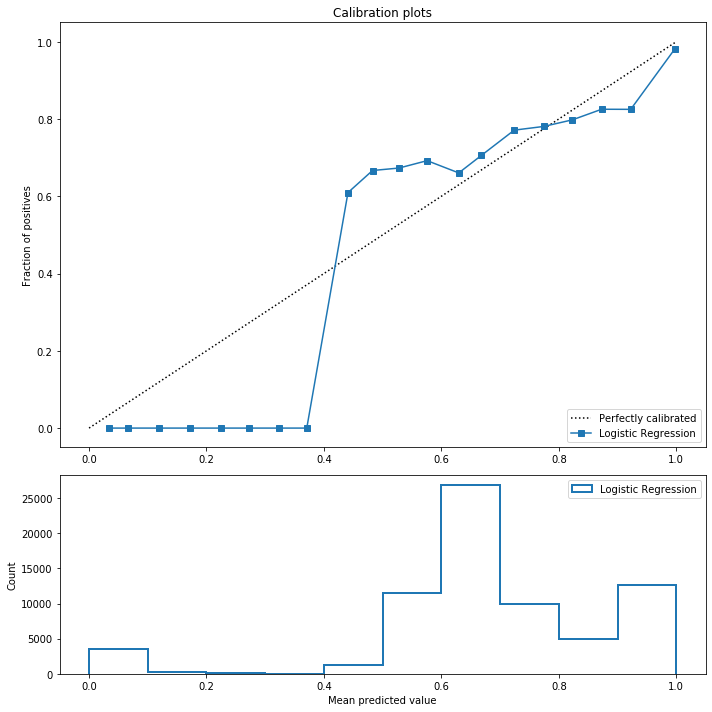

'\nIf the model is not well-calibrated, there are a few things\nyou can do:\n\nCollect more training data.\nUse a regularization technique to prevent overfitting.\nSimplify the model.\nCalibrate the model using a method such as Platt scaling or\nisotonic regression.\n'

In [62]:
y_pred_prob = logreg.predict_proba(X_train)[:, 1]

plot_calibration(y_train, y_pred_prob, 20, "Logistic Regression")
"""
If the model is not well-calibrated, there are a few things
you can do:

Collect more training data.
Use a regularization technique to prevent overfitting.
Simplify the model.
Calibrate the model using a method such as Platt scaling or
isotonic regression.
"""

In [63]:
print_accurcay_metrics(logreg, X_train, y_train, 0.65)

Accurcay: 0.6443916429997469
AUC: 0.7218433715982926
Log Loss: 0.49279784499498114
Confusion Matrix:
 [[12659  7505]
 [17788 33174]]
Recall: 0.6509556139868922
Precision: 0.8155067725361981


**Fit Logistic regression with L2 regularization (Ridge)**

Optimal Cutoff: [0.61144314]
Accurcay: 0.6917107187043078
AUC: 0.774842703580936
Log Loss: 0.546761018208294
Confusion Matrix:
 [[3352 1655]
 [3827 8948]]
Recall: 0.7004305283757338
Precision: 0.8439121003489578


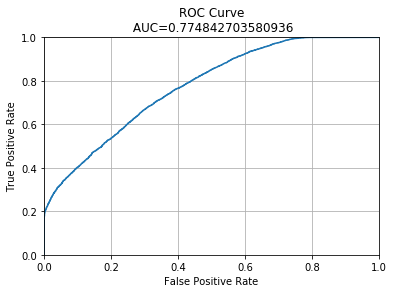

In [64]:

"""
Ridge classification is a type of regularized linear regression 
that can be used for classification tasks. It is similar to 
logistic regression, but it adds a penalty term to the cost 
function that penalizes large model coefficients. This helps 
to prevent overfitting and improve the generalization performance of the model.

Ridge classification is a good choice for classification tasks 
when the data is noisy or the number of features is large. It is
also a good choice when the features are highly correlated.

To use ridge classification, we first need to train the model on a 
set of labeled training data. Once the model is trained, we can use 
it to make predictions on new data.

Here is an example of how to use ridge classification to classify
customer churn data:

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

# Load the data
df = pd.read_csv('customer_churn_data.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, df['churn'],
test_size=0.25)

# Create a ridge classifier model
ridge = RidgeClassifier(alpha=1.0)

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
```

In this example, we are using the `RidgeClassifier()` 
class from the `scikit-learn` library to create a ridge 
classifier model. We are setting the `alpha` parameter to 1.0, 
but this parameter can be tuned to improve the model's performance.

Once the model is trained, we can use it to make predictions
on the test set. We then evaluate the model's performance using 
the `accuracy_score()` function.

Ridge classification is a powerful tool for classification tasks.
It is easy to use and can be effective for a wide range of problems.
"""


ridge = RidgeClassifier(alpha=1.0)
model_training(ridge, X_train, y_train)

plot_auc_curve(ridge, X_test, y_test)
Find_Optimal_Cutoff(ridge, X_test, y_test)
print_accurcay_metrics(ridge, X_test, y_test, 0.61)

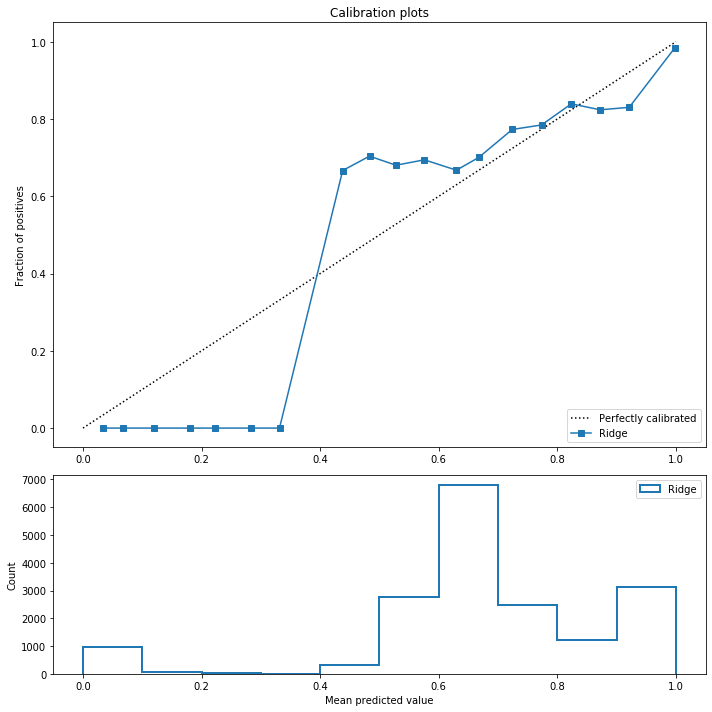

In [65]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

plot_calibration(y_test, y_pred_prob, 20, "Ridge")

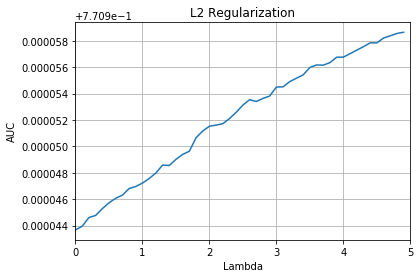

In [66]:

"""
Ridge regression adds “squared magnitude” of 
coefficient as penalty term to the loss function.
Here the highlighted part represents L2 regularization element.

The code you provided is used to tune the alpha parameter of a
ridge classifier model using cross-validation.

The alpha parameter is a regularization parameter that controls
the strength of the penalty on large model coefficients. A higher value of alpha will result in a more regularized model, which can help to prevent overfitting and improve the generalization performance of the model.

The code works by iterating over a range of alpha values and 
training and evaluating a ridge classifier model for each value. 
The performance of the model is evaluated using the 5-fold cross-validation
technique.

The cross_val_score() function from the scikit-learn library is
used to perform the cross-validation. The scoring parameter is set 
to roc_auc, which means that the area under the receiver operating 
characteristic (ROC) curve is used to evaluate the performance of the model.

The average ROC AUC score for each alpha value is stored in the 
scores list.

Once the code has finished running, the scores list will contain 
a list of ROC AUC scores for each alpha value. The best alpha value 
is the one that corresponds to the highest ROC AUC score.


K-fold cross-validation is a resampling technique used to 
evaluate the performance of machine learning models on a limited
data sample. It works by dividing the data sample into k subsets, 
or folds. The model is then trained and evaluated k times, using a
different fold as the validation set each time. The performance metrics
obtained from each fold are averaged to provide a more robust estimate 
of the model's generalization performance

K-fold cross-validation is a popular technique for evaluating machine learning
models because it is relatively simple to implement and it can be used with a
variety of different models. It is also a good way to avoid overfitting, which
is a common problem when training machine learning models on small datasets.
"""

alpha_range = np.arange(0.001, 5, 0.1)
scores = []
for lam in alpha_range:
  ridge = RidgeClassifier(alpha=lam)
  scores.append(cross_val_score(ridge, X_train, y_train, cv=5, scoring='roc_auc').mean())

plt.plot(alpha_range, scores)
plt.xlim([0.0, 5])
#plt.ylim([0.0, 1.0])
plt.title('L2 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

In [67]:
scores

[0.7709436674330263,
 0.7709439448015283,
 0.7709446065257987,
 0.770944762215704,
 0.7709452779766025,
 0.7709457207416666,
 0.7709460662061656,
 0.7709462997946994,
 0.7709468009544472,
 0.7709469615220327,
 0.77094721943528,
 0.7709475648934674,
 0.7709479833427154,
 0.7709485817863742,
 0.7709485525978369,
 0.7709490148512523,
 0.7709493895380349,
 0.770949632776858,
 0.7709506545632638,
 0.7709511654715566,
 0.7709515304122607,
 0.7709516131225751,
 0.7709517201655591,
 0.7709521142765947,
 0.7709525862290428,
 0.7709531311820852,
 0.7709535398806668,
 0.7709534036674044,
 0.7709536371980058,
 0.770953822050499,
 0.7709544983491879,
 0.7709545129673243,
 0.7709549119646856,
 0.7709551698535216,
 0.7709554228761076,
 0.7709559824384685,
 0.7709561722149981,
 0.770956157615293,
 0.7709563522127241,
 0.7709567609165301,
 0.77095676574678,
 0.7709570284585066,
 0.7709572961071183,
 0.770957558890302,
 0.7709578508411787,
 0.7709578459898326,
 0.7709582157368791,
 0.7709583811263074,
 

**Fit Logistic regression with L1 regularization (Lasso)**

Optimal Cutoff: [0.62913569]
Accurcay: 0.4529861657856259
AUC: 0.6409466668386372
Log Loss: 0.5424248068932721
Confusion Matrix:
 [[4794  213]
 [9514 3261]]
Recall: 0.2552641878669276
Precision: 0.9386873920552677


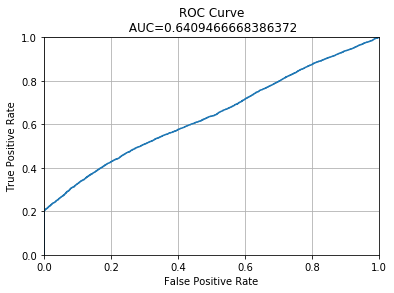

In [71]:
"""
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds 
“absolute value of magnitude” of coefficient as penalty term to the 
loss function.

The code lasso = LogisticRegression(penalty='l1', C=1) creates
a logistic regression model with L1 regularization.

L1 regularization is a regularization technique that penalizes 
large model coefficients. This helps to prevent overfitting and 
improve the generalization performance of the model.

The C parameter is the regularization strength parameter. A higher
value of C will result in a more regularized model, which can help 
to prevent overfitting. However, a too high value of C can also lead
to underfitting, which is when the model is too simple to learn the
relationship between the input and output variables.

The default value of C is 1.0, but this parameter can be tuned to
improve the model's performance.
"""


lasso = LogisticRegression(penalty='l1', C=1,  solver='saga')
model_training(lasso, X_train, y_train)

plot_auc_curve(lasso, X_test, y_test)
Find_Optimal_Cutoff(lasso, X_test, y_test)
print_accurcay_metrics(lasso, X_test, y_test, 0.73)

In [ ]:
lambda_range = np.arange(0.001, 5, 0.1)
scores = []
for lam in lambda_range:
  lasso = LogisticRegression(penalty='l1', C=1/lam, solver= 'saga')
  scores.append(cross_val_score(lasso, X_train, y_train, cv=5, scoring='roc_auc').mean())




ValueError: x and y must have same first dimension, but have shapes (50,) and (21,)

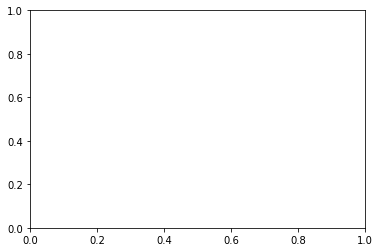

In [76]:
plt.plot(lambda_range, scores)
plt.xlim([0.0, 5])
#plt.ylim([0.0, 1.0])
plt.title('L1 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

**2-degree Polynomial Features**

In [77]:
"""
The code `poly = PolynomialFeatures(2)` creates a polynomial
features transformer object that will generate polynomial features 
of degree 2.

Polynomial features are features that are created by raising existing
features to a power. For example, if you have a single feature X, then 
a polynomial feature of degree 2 would be X^2.

Polynomial features can be used to capture non-linear relationships 
between features. For example, if you have a feature that represents 
the square footage of a house and a feature that represents the number
of bedrooms in a house, you could create a polynomial feature of degree
2 to capture the relationship between these two features.

Polynomial features can be used with any machine learning algorithm,
but they are most commonly used with linear regression and logistic 
regression algorithms.

Here is an example of how to use the `PolynomialFeatures` transformer
to create polynomial features of degree 2 for a dataset with two features:

```python
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create the dataset
X = np.array([[1, 2], [3, 4]])

# Create the polynomial features transformer
poly = PolynomialFeatures(2)

# Transform the dataset
X_poly = poly.fit_transform(X)

# Print the transformed dataset
print(X_poly)
```

Output:

```
[[ 1.  2.  1.  4.  4.  16.]
 [ 9. 12.  9.  16.  24.  36.]]
```

As you can see, the transformed dataset contains six features, 
which are the original two features plus the four polynomial 
features of degree 2.

Polynomial features can be a powerful tool for capturing non-linear 
relationships between features and improving the performance of machine 
learning models. However, it is important to be aware that using too
many polynomial features can lead to overfitting.

"""

poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [67]:
print(X_test.shape)
print(X_test_poly.shape)

(17782, 30)
(17782, 496)


Optimal Cutoff: [1.5]
Accurcay: 0.2815768754920706
AUC: 0.5
Log Loss: 0.6931471805599453
Confusion Matrix:
 [[ 5007     0]
 [12775     0]]
Recall: 0.0
Precision: 0.0


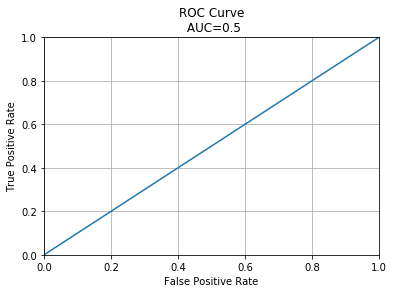

In [78]:
logreg_poly = LogisticRegression()
model_training(logreg_poly, X_train_poly, y_train)

plot_auc_curve(logreg_poly, X_test_poly, y_test)
Find_Optimal_Cutoff(logreg_poly, X_test_poly, y_test)
print_accurcay_metrics(logreg_poly, X_test_poly, y_test, 0.75)


Optimal Cutoff: [1.5]
Accurcay: 0.283496892838062
AUC: 0.5
Log Loss: 0.6931471805599453
Confusion Matrix:
 [[20164     0]
 [50962     0]]
Recall: 0.0
Precision: 0.0


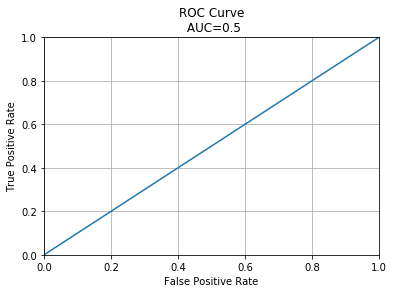

In [79]:
plot_auc_curve(logreg_poly, X_train_poly, y_train)
Find_Optimal_Cutoff(logreg_poly, X_train_poly, y_train)
print_accurcay_metrics(logreg_poly, X_train_poly, y_train, 0.75)


In [80]:
print_accurcay_metrics(logreg_poly, X_train_poly, y_train, 0.75)


Accurcay: 0.283496892838062
AUC: 0.5
Log Loss: 0.6931471805599453
Confusion Matrix:
 [[20164     0]
 [50962     0]]
Recall: 0.0
Precision: 0.0


Optimal Cutoff: [0.6066277]
Accurcay: 0.707906872117872
AUC: 0.7856372976072247
Log Loss: 0.5413509330961269
Confusion Matrix:
 [[3267 1740]
 [3454 9321]]
Recall: 0.729628180039139
Precision: 0.842690534309737


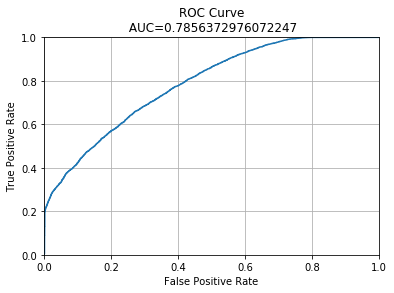

In [81]:
ridge_poly = RidgeClassifier(alpha=1.0)
model_training(ridge_poly, X_train_poly, y_train)

plot_auc_curve(ridge_poly, X_test_poly, y_test)
Find_Optimal_Cutoff(ridge_poly, X_test_poly, y_test)
print_accurcay_metrics(ridge_poly, X_test_poly, y_test, 0.6)

Optimal Cutoff: [0.50000064]
Accurcay: 0.4260488134068159
AUC: 0.6298381483144733
Log Loss: 0.5929965647372998
Confusion Matrix:
 [[ 5007     0]
 [10206  2569]]
Recall: 0.2010958904109589
Precision: 1.0


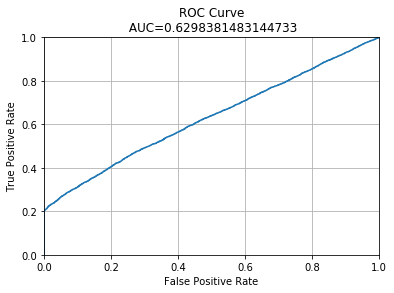

In [82]:
lasso_poly = LogisticRegression(penalty='l1', C=1, solver='saga')
model_training(lasso_poly, X_train_poly, y_train)

plot_auc_curve(lasso_poly, X_test_poly, y_test)
Find_Optimal_Cutoff(lasso_poly, X_test_poly, y_test)
print_accurcay_metrics(lasso_poly, X_test_poly, y_test, 0.73)

**Ranfom Forest**

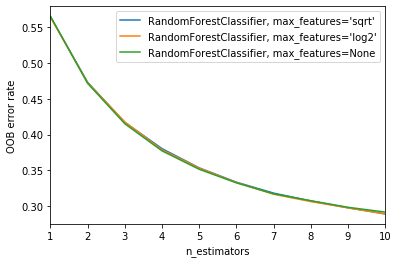

In [83]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 123

X = X_encoded
y = y_encoded

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.

"""


1

1
That is correct. The max_features="sqrt" parameter in the
RandomForestClassifier() constructor specifies that the maximum 
number of features to consider when splitting a node in each tree
will be equal to the square root of the total number of features.
This is a heuristic that has been shown to work well in practice, 
and it is the default value for the max_features parameter.

There are a few reasons why using the square root of the total 
number of features can be a good choice for the max_features parameter:

It helps to prevent overfitting. By only considering a subset of 
features at each split, the trees in the random forest are less 
likely to overfit the training data.
It improves the speed and efficiency of training. By considering 
fewer features at each split, the random forest can be trained more 
quickly.
It can improve the generalization performance of the random forest. 
By considering a subset of features at each split, the random forest
is more likely to learn features that are important for making 
predictions on new data.
However, it is important to note that the square root of the 
total number of features is not a magic number. The best value
for the max_features parameter may vary depending on the specific
dataset and problem you are working on. If you are not sure what 
value to use, you can start with the default value of sqrt and 
then tune it as needed.

Here is an example of how to tune the max_features parameter 
using a grid search:
"""
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 10


"""
The clf.oob_score_ attribute in scikit-learn is the 
out-of-bag (OOB) score of the ensemble classifier.
The OOB score is a measure of the classifier's generalization 
performance, and it is calculated using the samples that were 
not included in the training of the individual trees in the ensemble.

The OOB score is a useful metric for evaluating the performance 
of ensemble classifiers because it is independent of the training
data. This means that it can be used to get a more accurate estimate
of the classifier's performance on new data.
"""
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Optimal Cutoff: [0.72]
Accurcay: 0.6736025194016421
AUC: 0.7967103823727018
Log Loss: 0.4381581662973039
Confusion Matrix:
 [[3771 1236]
 [4568 8207]]
Recall: 0.642426614481409
Precision: 0.8691093932013132


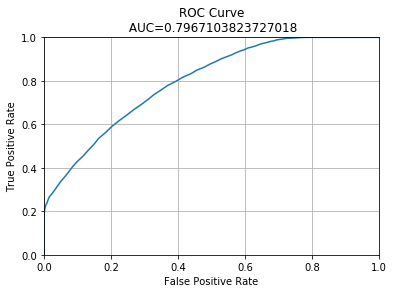

In [86]:
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features='sqrt',
                            n_jobs=-1)
model_training(rf, X_train, y_train)

plot_auc_curve(rf, X_test, y_test)
Find_Optimal_Cutoff(rf, X_test, y_test)
print_accurcay_metrics(rf, X_test, y_test, 0.73)

Optimal Cutoff: [0.71]
Accurcay: 0.6656169159824542
AUC: 0.793600239508133
Log Loss: 0.44570862529671634
Confusion Matrix:
 [[3787 1220]
 [4726 8049]]
Recall: 0.6300587084148728
Precision: 0.8683784658539216


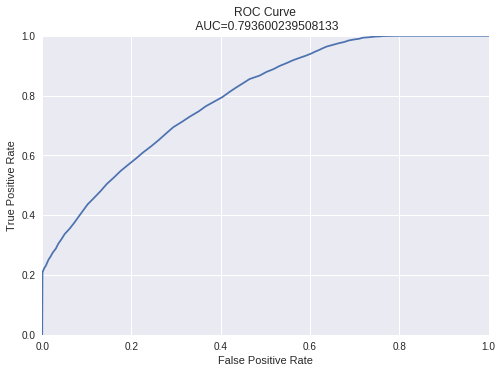

In [0]:
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features=None,
                            n_jobs=-1)
model_training(rf, X_train, y_train)

plot_auc_curve(rf, X_test, y_test)
Find_Optimal_Cutoff(rf, X_test, y_test)
print_accurcay_metrics(rf, X_test, y_test, 0.73)

In [0]:
print_accurcay_metrics(rf, X_train, y_train, 0.73)

Accurcay: 0.9960914433540478
AUC: 1.0
Log Loss: 0.12253440514446652
Confusion Matrix:
 [[20164     0]
 [  278 50684]]
Recall: 0.9945449550645579
Precision: 1.0


**Feature Importances**

Feature ranking:
1. Credit_Score (0.205297)
2. Current_Loan_Amount (0.139297)
3. Maximum_Open_Credit (0.089153)
4. Current_Credit_Balance (0.086238)
5. Monthly_Debt (0.085836)
6. Years_of_Credit_History (0.081426)
7. Annual_Income (0.078193)
8. Number_of_Open_Accounts (0.056693)
9. Months_since_last_delinquent (0.049870)
10. Years_in_current_job (0.042165)
11. Term_Short Term (0.029044)
12. Number_of_Credit_Problems (0.008109)
13. Purpose_Debt Consolidation (0.007761)
14. Bankruptcies (0.006280)
15. Purpose_Other (0.005561)
16. Home_Ownership_Rent (0.005068)
17. Home_Ownership_Home Mortgage (0.005012)
18. Home_Ownership_Own Home (0.003948)
19. Purpose_Home Improvements (0.003886)
20. Tax_Liens (0.002601)
21. Purpose_Medical Bills (0.001904)
22. Purpose_Buy a Car (0.001521)
23. Purpose_Buy House (0.001144)
24. Purpose_small_business (0.001048)
25. Purpose_Take a Trip (0.000814)
26. Purpose_major_purchase (0.000803)
27. Purpose_moving (0.000407)
28. Purpose_wedding (0.000359)
29. Purpose

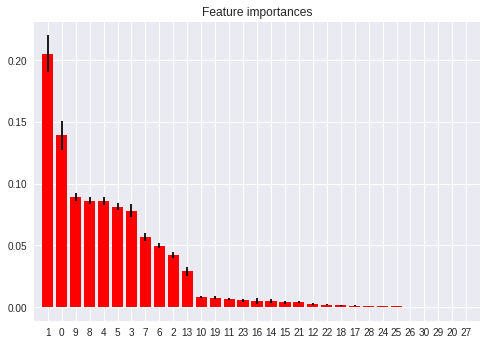

In [0]:
"""

Feature importance visualization is useful for 
understanding which features are most important for 
making predictions. This can be helpful for a number of reasons, including:

Identifying important features for model improvement: 
By understanding which features are most important, you 
can focus your efforts on improving those features or 
collecting more data for those features. This can lead 
to a more accurate and reliable model.
Interpreting model predictions: Feature importance visualization 
can help you to understand why the model made a particular prediction. 
This can be helpful for debugging the model or for explaining the 
model's predictions to others.
Selecting features for downstream tasks: If you are planning to 
use the model to make predictions on new data, you may want to select
only the most important features. This can reduce the computational
cost of making predictions and improve the model's performance on new data.
There are a number of different ways to visualize feature importance. 
One common approach is to use a bar chart, where the height of each 
bar represents the importance of a particular feature. Another approach 
is to use a heatmap, where the color of each cell represents the 
importance of the corresponding feature
"""

feature_importance(rf, X_train)

Optimal Cutoff: [0.71]
Accurcay: 0.6677539084467439
AUC: 0.795671429861208
Log Loss: 0.43619162374024834
Confusion Matrix:
 [[3799 1208]
 [4700 8075]]
Recall: 0.6320939334637965
Precision: 0.8698696542066142


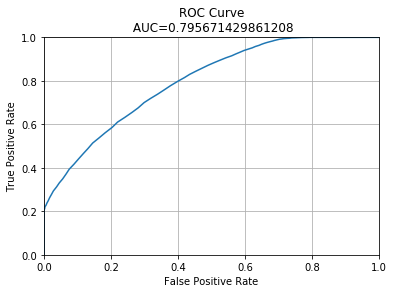

In [27]:
rf_poly = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features='sqrt',
                            n_jobs=-1)
model_training(rf_poly, X_train_poly, y_train)

plot_auc_curve(rf_poly, X_test_poly, y_test)
Find_Optimal_Cutoff(rf_poly, X_test_poly, y_test)
print_accurcay_metrics(rf_poly, X_test_poly, y_test, 0.73)

**Bagging**

Optimal Cutoff: [0.8]
Accurcay: 0.6486334495557305
AUC: 0.7658474300363053
Log Loss: 0.911275122744408
Confusion Matrix:
 [[3687 1320]
 [4928 7847]]
Recall: 0.6142465753424657
Precision: 0.8560052361732301


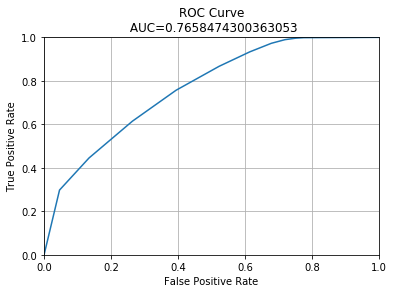

In [85]:
"""
This random forest classifier is essentially a 
bagging classifier, because it is trained on bootstrapped 
samples of the training data. Bagging is a technique that 
can be used to improve the performance of machine learning models 
by reducing their variance.
"""

bagging = RandomForestClassifier(n_estimators=10, 
                            criterion='gini', 
                            max_features=None,
                            n_jobs=-1)
model_training(bagging, X_train, y_train)

plot_auc_curve(bagging, X_test, y_test)
Find_Optimal_Cutoff(bagging, X_test, y_test)
print_accurcay_metrics(bagging, X_test, y_test, 0.73)

In [0]:
print_accurcay_metrics(bagging, X_train, y_train, 0.73)

Accurcay: 0.9476843910806175
AUC: 0.9993173364891933
Log Loss: 0.12855648584544643
Confusion Matrix:
 [[20148    16]
 [ 3705 47257]]
Recall: 0.9272987716337663
Precision: 0.9996615404141899


**Boosting**

Optimal Cutoff: [0.50220576]
Accurcay: 0.2815768754920706
AUC: 0.8022008092779697
Log Loss: 0.6564135187775232
Confusion Matrix:
 [[ 5007     0]
 [12775     0]]
Recall: 0.0
Precision: 0.0


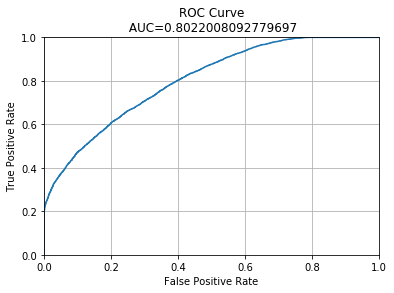

In [29]:
"""


1
The 100 in AdaBoostClassifier(n_estimators=100) specifies 
the number of estimators to use in the AdaBoost ensemble. 
An estimator is a weak learner, which is a classifier that 
is only slightly better than random guessing. AdaBoost works
by iteratively training weak learners on the training data, 
where each weak learner is trained to correct the errors of 
the previous weak learner.

The number of estimators in an AdaBoost ensemble is a hyperparameter 
that can be tuned to improve the performance of the model. A higher 
number of estimators will generally lead to a more accurate model, 
but it will also make the model more computationally expensive to train.

A good starting point for tuning the number of estimators in an 
AdaBoost ensemble is to use the default value of 100. You can then
experiment with different values to see if you can improve the 
performance of the model on your specific dataset.
"""


adaBoost = AdaBoostClassifier(n_estimators=100)
model_training(adaBoost, X_train, y_train)

plot_auc_curve(adaBoost, X_test, y_test)
Find_Optimal_Cutoff(adaBoost, X_test, y_test)
print_accurcay_metrics(adaBoost, X_test, y_test, 0.73)

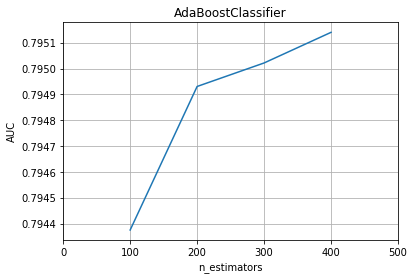

In [30]:
n_range = np.arange(100, 500, 100)
scores = []
for n in n_range:
  adaBoost = AdaBoostClassifier(n_estimators=n)
  scores.append(cross_val_score(adaBoost, X_train, y_train, cv=5, scoring='roc_auc').mean())


plt.plot(n_range, scores)
plt.xlim([0.0, 500])
#plt.ylim([0.0, 1.0])
plt.title('AdaBoostClassifier')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)

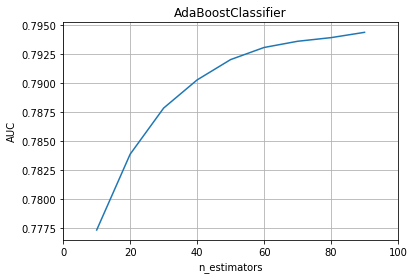

In [31]:
n_range = np.arange(10, 100, 10)
scores = []
for n in n_range:
  adaBoost = AdaBoostClassifier(n_estimators=n)
  scores.append(cross_val_score(adaBoost, X_train, y_train, cv=5, scoring='roc_auc').mean())


plt.plot(n_range, scores)
plt.xlim([0.0, 100])
#plt.ylim([0.0, 1.0])
plt.title('AdaBoostClassifier')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)

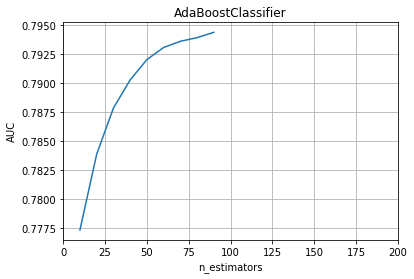

In [32]:
plt.plot(n_range, scores)
plt.xlim([0.0, 200])
#plt.ylim([0.0, 1.0])
plt.title('AdaBoostClassifier')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)